In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


mat = pd.read_csv("/kaggle/input/students/student-mat.csv",sep=";")
por = pd.read_csv("/kaggle/input/students/student-por.csv",sep=';')

/kaggle/input/students/student-mat.csv
/kaggle/input/students/student-por.csv


# Features

#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:  
  
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)   
2 sex - student's sex (binary: "F" - female or "M" - male)    
3 age - student's age (numeric: from 15 to 22)   
4 address - student's home address type (binary: "U" - urban or "R" - rural)   
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)   
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)    
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)    
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)    
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")    
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")    
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")    
12 guardian - student's guardian (nominal: "mother", "father" or "other")   
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)   
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)   
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)   
16 schoolsup - extra educational support (binary: yes or no)   
17 famsup - family educational support (binary: yes or no)   
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  

these grades are related with the course subject, Math or Portuguese:      
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)  

Additional note: there are several (382) students that belong to both datasets .   
These students can be identified by searching for identical attributes that characterize each student. 


# Tools Used in Exploratory Data Analysis

#### Pearson Correlation + Heatmap:   
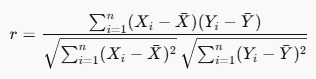

ranges from –1 to +1:

+1 indicates a perfect positive linear relationship: as one variable increases, the other increases proportionally.

–1 indicates a perfect negative linear relationship: as one increases, the other decreases proportionally.

0 indicates no linear relationship (though there might still be a nonlinear association).

#### Boxplot:   
Drawing of a box and whisker plot.

The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. The whiskers extend from the box to the farthest data point lying within 1.5x the inter-quartile range (IQR) from the box. Flier points are those past the end of the whiskers.   

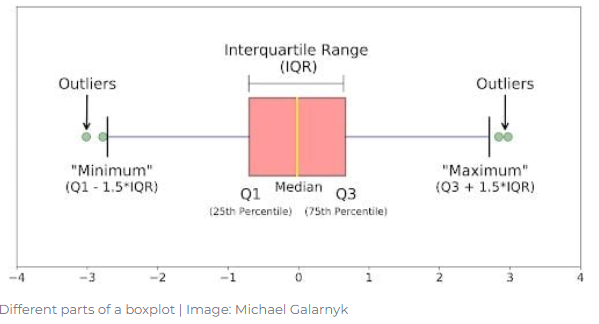
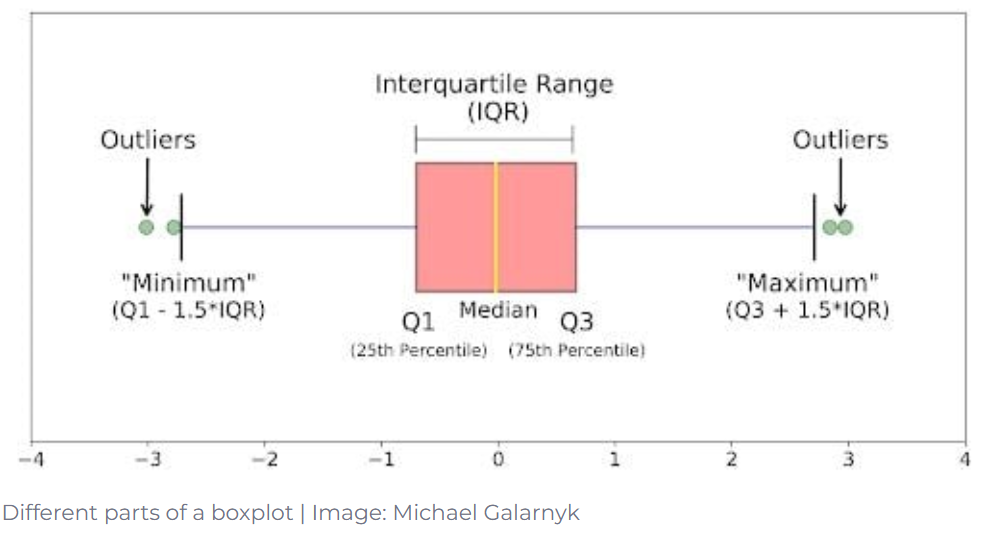

# Math Data Exploration

In [67]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [68]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [69]:
mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [70]:
mat.describe(include='O')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


## Pearson Correlation

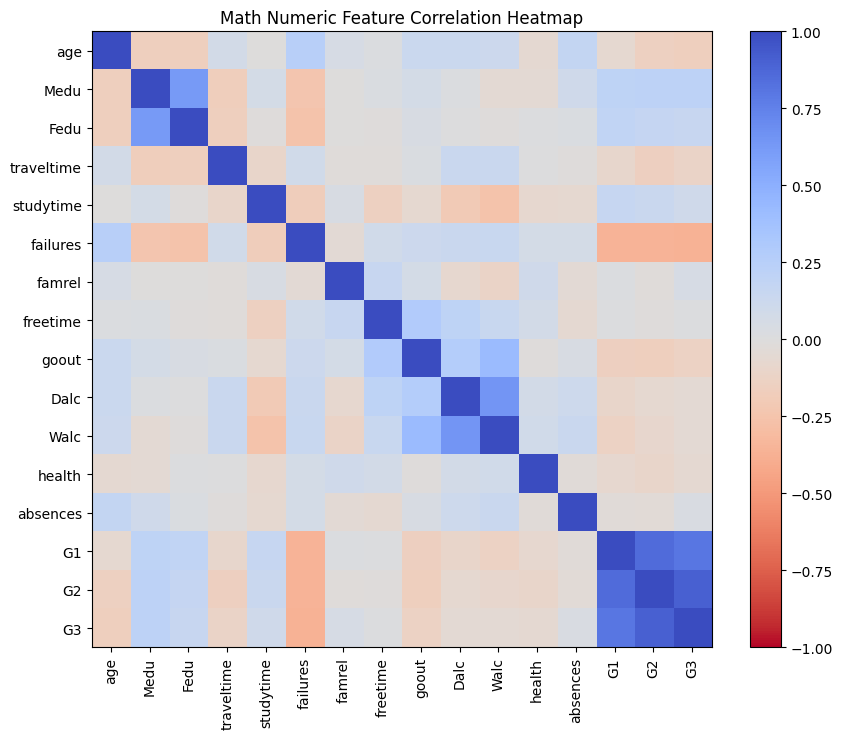

In [71]:
numeric_mat = mat.select_dtypes(include=[np.number])
corr_mat = numeric_mat.corr()
plt.figure(figsize=(10,8))
# Use a diverging colormap centered at 0 to highlight negative vs positive correlations
plt.imshow(
    corr_mat,
    interpolation='nearest',
    aspect='auto',
    cmap='coolwarm_r',  # diverging palette
    vmin=-1,
    vmax=1
)
plt.colorbar()
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.index)), corr_mat.index)
plt.title('Math Numeric Feature Correlation Heatmap')
plt.show()


## Boxplot for Categorical Features vs Grades

Refer to 'Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:' for feature names and definitions

### Study Time

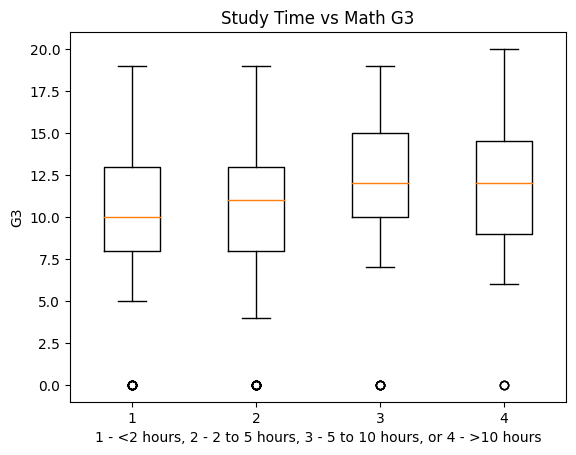

In [72]:
plt.figure()
plt.boxplot([mat[mat['studytime']==i]['G3'] for i in sorted(mat['studytime'].unique())],
            labels=sorted(mat['studytime'].unique()))
plt.title(f'Study Time vs Math G3')
plt.xlabel('1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours')
plt.ylabel('G3')
plt.show()

### Going out with friends

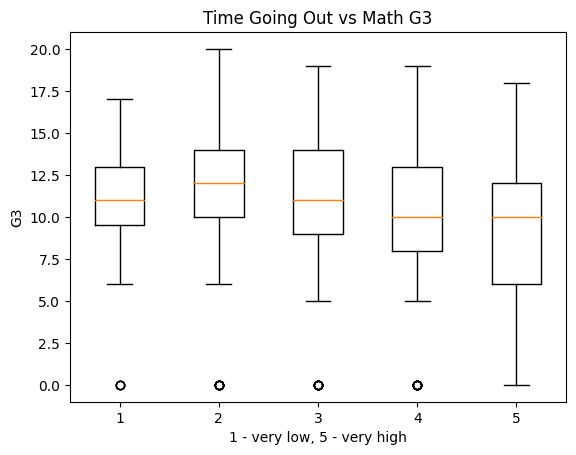

In [73]:
plt.figure()
plt.boxplot([mat[mat['goout']==i]['G3'] for i in sorted(mat['goout'].unique())],
            labels=sorted(mat['goout'].unique()))
plt.title(f'Time Going Out vs Math G3')
plt.xlabel('1 - very low, 5 - very high')
plt.ylabel('G3')
plt.show()

### Travel time

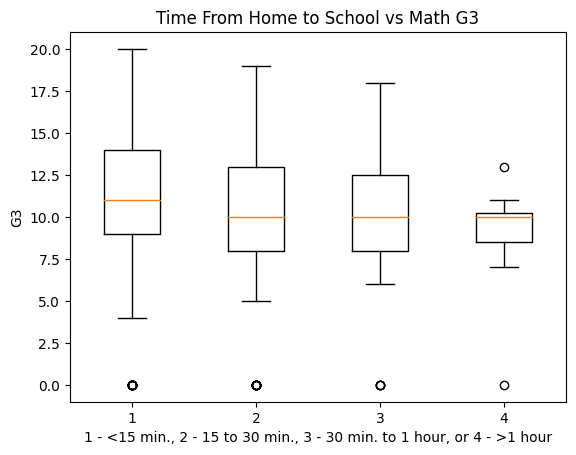

In [74]:
plt.figure()
plt.boxplot([mat[mat['traveltime']==i]['G3'] for i in sorted(mat['traveltime'].unique())],
            labels=sorted(mat['traveltime'].unique()))
plt.title(f'Time From Home to School vs Math G3')
plt.xlabel('1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour')
plt.ylabel("G3")
plt.show()

### Parents Cohabitation Status

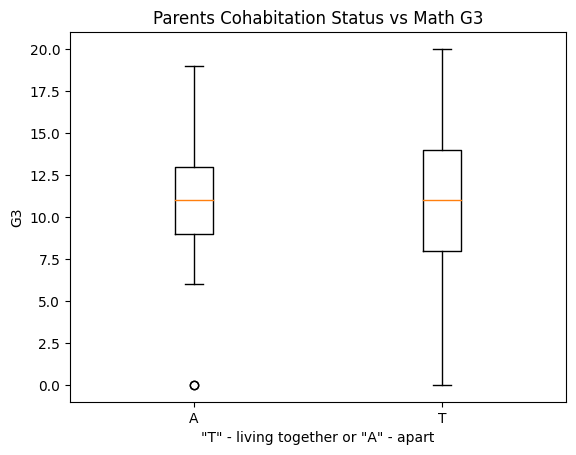

In [75]:
plt.figure()
plt.boxplot([mat[mat['Pstatus']==i]['G3'] for i in sorted(mat['Pstatus'].unique())],
            labels=sorted(mat['Pstatus'].unique()))
plt.title(f'Parents Cohabitation Status vs Math G3')
plt.xlabel('"T" - living together or "A" - apart')
plt.ylabel("G3")
plt.show()

# Language Data Exploration

In [76]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [77]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [78]:
por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [79]:
por.describe(include='O')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


## Pearson Correlation

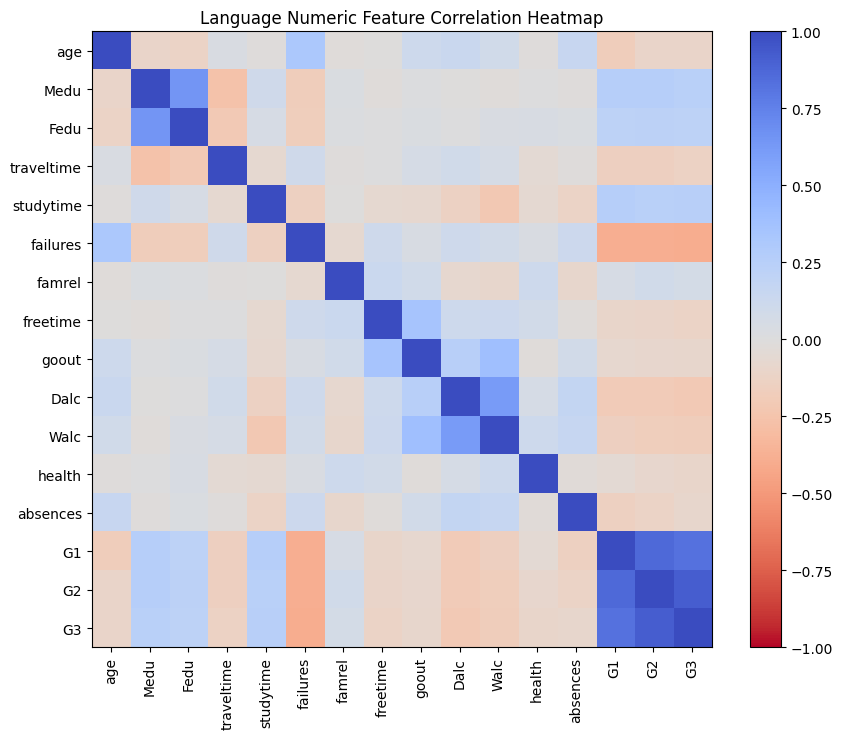

In [80]:
numeric_por = por.select_dtypes(include=[np.number])
corr_por = numeric_por.corr()
plt.figure(figsize=(10,8))
# Use a diverging colormap centered at 0 to highlight negative vs positive correlations
plt.imshow(
    corr_por,
    interpolation='nearest',
    aspect='auto',
    cmap='coolwarm_r',  # diverging palette
    vmin=-1,
    vmax=1
)
plt.colorbar()
plt.xticks(range(len(corr_por.columns)), corr_por.columns, rotation=90)
plt.yticks(range(len(corr_por.index)), corr_por.index)
plt.title('Language Numeric Feature Correlation Heatmap')
plt.show()


## Boxplot for Categorical Features vs Grades

## Study Time

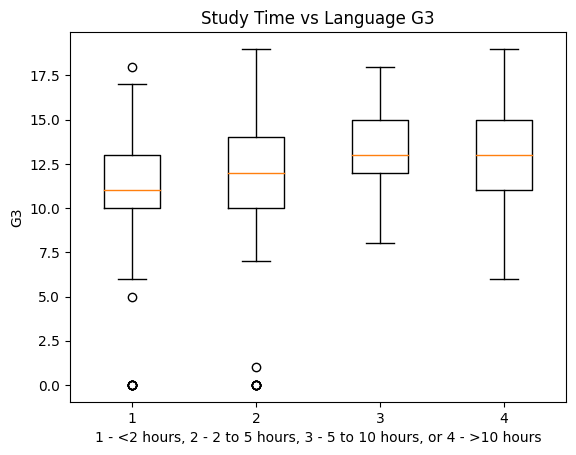

In [81]:
plt.figure()
plt.boxplot([por[por['studytime']==i]['G3'] for i in sorted(por['studytime'].unique())],
            labels=sorted(por['studytime'].unique()))
plt.title(f'Study Time vs Language G3')
plt.xlabel('1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours')
plt.ylabel("G3")
plt.show()

### Going out with friends

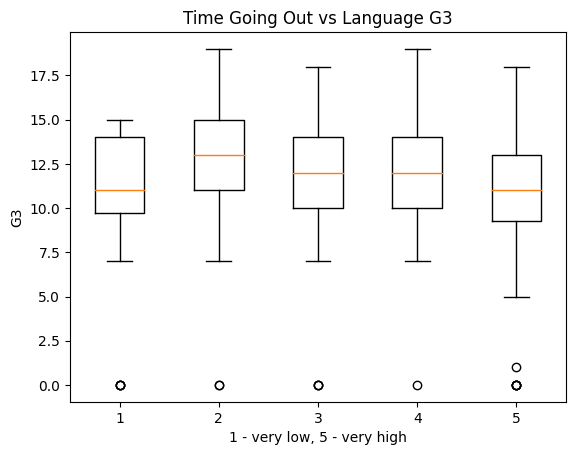

In [82]:
plt.figure()
plt.boxplot([por[por['goout']==i]['G3'] for i in sorted(por['goout'].unique())],
            labels=sorted(por['goout'].unique()))
plt.title(f'Time Going Out vs Language G3')
plt.xlabel('1 - very low, 5 - very high')
plt.ylabel("G3")
plt.show()

### Travel Time

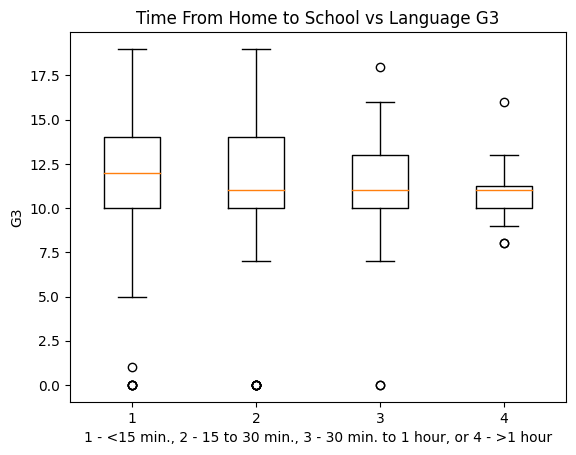

In [83]:
plt.figure()
plt.boxplot([por[por['traveltime']==i]['G3'] for i in sorted(por['traveltime'].unique())],
            labels=sorted(por['traveltime'].unique()))
plt.title(f'Time From Home to School vs Language G3')
plt.xlabel('1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour')
plt.ylabel("G3")
plt.show()

### Parents Cohabitation Status

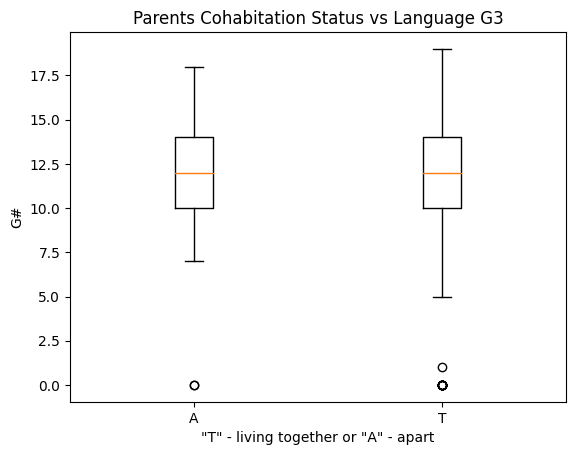

In [84]:
plt.figure()
plt.boxplot([por[por['Pstatus']==i]['G3'] for i in sorted(por['Pstatus'].unique())],
            labels=sorted(mat['Pstatus'].unique()))
plt.title(f'Parents Cohabitation Status vs Language G3')
plt.xlabel('"T" - living together or "A" - apart')
plt.ylabel("G#")
plt.show()

# Machine Learning

### Import sklearn Tools

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Use Support Vector Regression (SVM) for default pipeline
from sklearn.svm import SVR
import shap

### Define Function to prepare data and build pipeline

In [86]:
def prepare_pipeline(df, model=None):
    # Drop period grades
    X = df.drop(columns=['G3'])
    y = df['G3']

    # Identify numeric and categorical columns
    num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
    cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

    # Preprocessing transformers
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_cols),
            ('cat', categorical_transformer, cat_cols)
        ]
    )

    # Default to SVR if no model provided
    if model is None:
        model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

    # Full pipeline with chosen regressor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    return pipeline, X, y

### Model Training and Evaluation

In [87]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
pipe_math_default, X_math, y_math = prepare_pipeline(mat)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_math, y_math, test_size=0.2, random_state=42)

# Define models to compare
model_dict = {
    'LinearRegression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'SVR': SVR()
}

results_math = {}
for name, mdl in model_dict.items():
    pipe, _, _ = prepare_pipeline(mat, model=mdl)
    pipe.fit(X_train_m, y_train_m)
    pred = pipe.predict(X_test_m)
    results_math[name] = {
        'RMSE': mean_squared_error(y_test_m, pred, squared=False),
        'R2': r2_score(y_test_m, pred)
    }

print('Math Model Comparison:')
for name, metrics in results_math.items():
    print(f"{name}: RMSE={metrics['RMSE']:.3f}, R2={metrics['R2']:.3f}")

# Portuguese dataset
pipe_por_default, X_por, y_por = prepare_pipeline(por)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_por, y_por, test_size=0.2, random_state=42)

results_por = {}
for name, mdl in model_dict.items():
    pipe, _, _ = prepare_pipeline(por, model=mdl)
    pipe.fit(X_train_p, y_train_p)
    pred = pipe.predict(X_test_p)
    results_por[name] = {
        'RMSE': mean_squared_error(y_test_p, pred, squared=False),
        'R2': r2_score(y_test_p, pred)
    }

print('Portuguese Model Comparison:')
for name, metrics in results_por.items():
    print(f"{name}: RMSE={metrics['RMSE']:.3f}, R2={metrics['R2']:.3f}")

Math Model Comparison:
LinearRegression: RMSE=2.378, R2=0.724
XGBoost: RMSE=2.133, R2=0.778
SVR: RMSE=2.364, R2=0.728
Portuguese Model Comparison:
LinearRegression: RMSE=1.215, R2=0.849
XGBoost: RMSE=1.289, R2=0.829
SVR: RMSE=1.515, R2=0.765


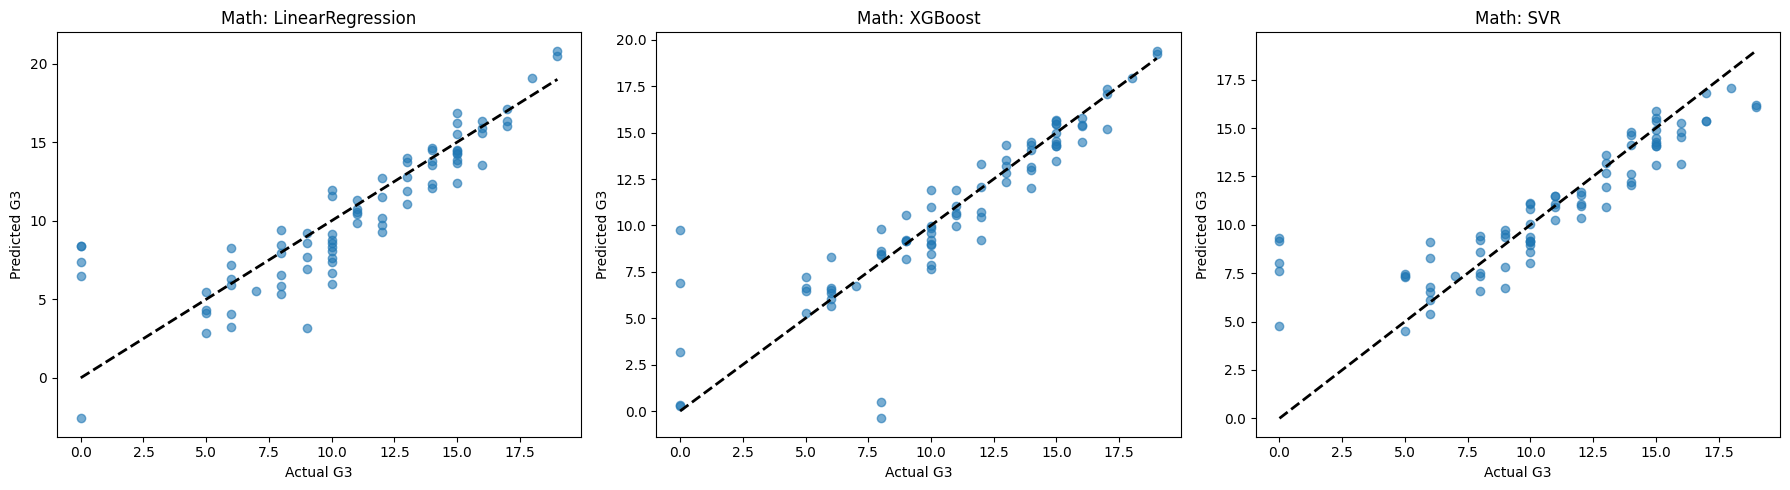

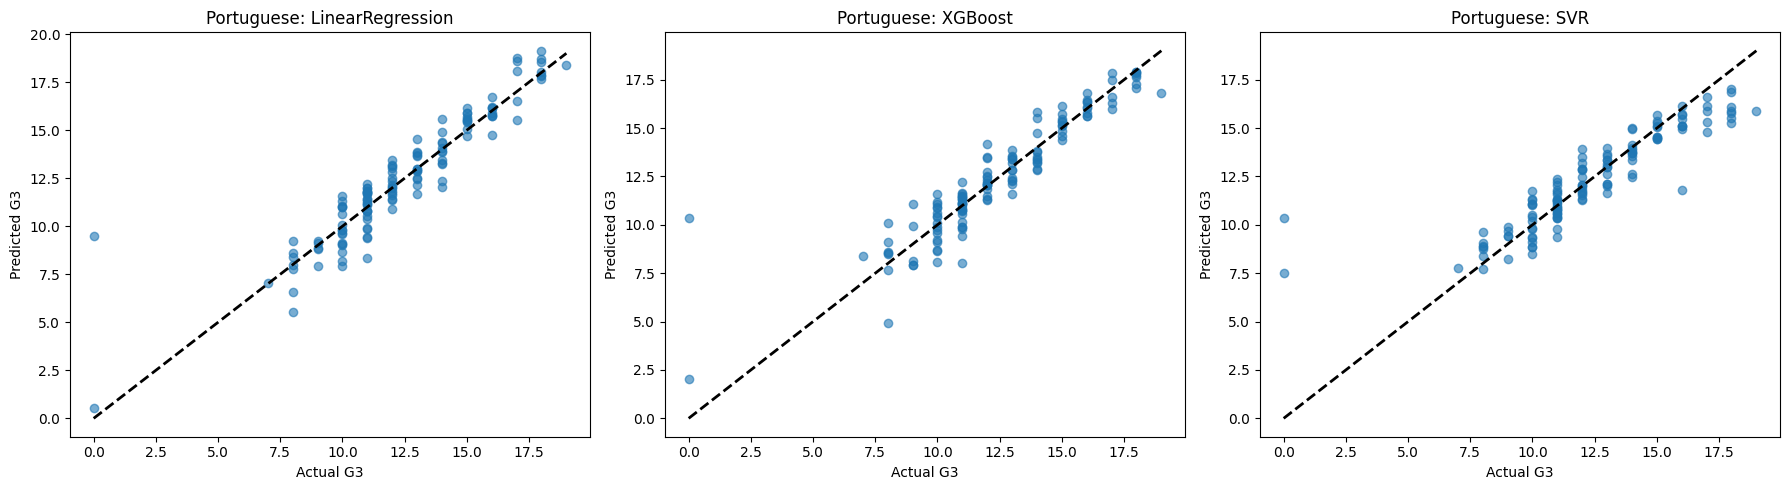

In [88]:
# Plot actual vs predicted for each model on both Math and Portuguese datasets
import matplotlib.pyplot as plt

# Function to plot actual vs predicted
def plot_actual_vs_pred(ax, y_true, y_pred, title):
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    ax.set_xlabel('Actual G3')
    ax.set_ylabel('Predicted G3')
    ax.set_title(title)

# Math plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, mdl) in zip(axes, model_dict.items()):
    pipe = prepare_pipeline(mat, model=mdl)[0]
    pipe.fit(X_train_m, y_train_m)
    y_pred = pipe.predict(X_test_m)
    plot_actual_vs_pred(ax, y_test_m, y_pred, f'Math: {name}')
plt.tight_layout()
plt.show()

# Portuguese plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, mdl) in zip(axes, model_dict.items()):
    pipe = prepare_pipeline(por, model=mdl)[0]
    pipe.fit(X_train_p, y_train_p)
    y_pred = pipe.predict(X_test_p)
    plot_actual_vs_pred(ax, y_test_p, y_pred, f'Portuguese: {name}')
plt.tight_layout()
plt.show()

### Using Only G1 and G2 as input features

In [90]:
# Function to train and evaluate models on only G1 and G2
def evaluate_g1_g2_models(df, subject_name):
    # Prepare features and target
    X = df[['G1','G2']]
    y = df['G3']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Define baseline models
    models = {
        'LinearRegression': LinearRegression(),
        'XGBoost': XGBRegressor(),
        'SVR': SVR()
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        results[name] = {
            'RMSE': mean_squared_error(y_test, preds, squared=False),
            'R2': r2_score(y_test, preds)
        }
    # Display results
    print(f"{subject_name} Baseline (G1+G2) Model Results:")
    for name, metrics in results.items():
        print(f"{name}: RMSE={metrics['RMSE']:.3f}, R2={metrics['R2']:.3f}")
    return models, X_test, y_test

# Evaluate on Math dataset
g1g2_models_math, X_test_g12_m, y_test_g12_m = evaluate_g1_g2_models(mat, 'Math')

# Evaluate on Portuguese dataset
g1g2_models_por, X_test_g12_p, y_test_g12_p = evaluate_g1_g2_models(por, 'Portuguese')

Math Baseline (G1+G2) Model Results:
LinearRegression: RMSE=2.052, R2=0.795
XGBoost: RMSE=2.192, R2=0.766
SVR: RMSE=2.119, R2=0.781
Portuguese Baseline (G1+G2) Model Results:
LinearRegression: RMSE=1.169, R2=0.860
XGBoost: RMSE=1.462, R2=0.781
SVR: RMSE=1.341, R2=0.815
